<a href="https://colab.research.google.com/github/teacher-jiejie/Lets-get-it-Python-Book-Code/blob/main/14%E1%84%8C%E1%85%A1%E1%86%BC-2%20%E1%84%8F%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A2%E1%84%89%E1%85%B3%E1%84%8B%E1%85%AA%20%E1%84%80%E1%85%A2%E1%86%A8%E1%84%8E%E1%85%A6%20%3A%20%E1%84%92%E1%85%A1%E1%86%BA%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%89%E1%85%B3_%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B3_%E1%84%8C%E1%85%A2%E1%84%80%E1%85%AE%E1%84%89%E1%85%A5%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 14.3. 클래스와 객체로 핫플레이스 프로젝트 재구성하기
#### 14.3.1  클래스 구조 만들기
#### 14.3.2  코드 수정하기

In [ ]:
import matplotlib.pyplot as plt
import datetime

class Hotplace : 
    def __init__(self, dong_name, dong_code) : 
        self.name = dong_name
        self.code = dong_code
        
    def graph_plot(self, popu_list, label_list, graph_title) :        
        plt.rc('font', family='Malgun Gothic')
        plt.title(graph_title)    
        for i in range(len(popu_list)) : 
            plt.plot(range(24), popu_list[i], label = label_list[i])
        plt.legend()
        plt.xlabel('시간대')
        plt.ylabel('평균인구수')
        plt.xticks(range(24), range(24))
        plt.show()
        
    # analysis4()에서 다른 지역을 넣어 호출하는 부분이 있어 매개변수를 두어야 함
    def analysis1(self, dong_name, dong_code, graph_yn = 'y') : 
        population = [0 for i in range(24)]
        for row in data : 
            if row[2] == dong_code : 
                time, p = row[1], row[3]
                population[time] += p
        population = [p/31 for p in population]

        if graph_yn == 'n' : 
            return population

        population = [population]
        labels = ['평균인구']
        title  = dong_name +' 시간대별 평균인구 그래프'
        self.graph_plot(popu_list= population, label_list= labels, graph_title= title)

    def analysis2(self) :         
        weekday = [0 for i in range(24)]
        weekend = [0 for i in range(24)]
        
        for row in data : 
            if row[2] == self.code : 
                time, p = row[1], row[3]
                year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
                num = datetime.date(year, mon, day).weekday()
                if num < 5 : 
                    weekday[time] += p
                else : 
                    weekend[time] += p
        weekday = [w/22 for w in weekday]
        weekend = [w/9 for w in weekend]

        data_set = [weekday, weekend]
        labels = ['평일','주말']
        title = self.name +' 평일/주말 시간대별 인구'
        self.graph_plot(popu_list= data_set, label_list= labels, graph_title= title)
    
    def analysis3(self) : 
        male = [0 for i in range(24)]
        female = [0 for i in range(24)]
        
        for row in data : 
            if row[2] == self.code : 
                time = int(row[1])                
                male[time] += sum(row[4:18])     # 남성 인구 총합 구하기  
                female[time] += sum(row[18:32])   # 여성 인구 총합 구하기

        male = [m/31 for m in male]
        female = [f/31 for f in female]

        data_set = [male, female]
        labels = ['남성','여성']
        title = self.name +' 남녀 시간대별 인구 그래프'
        self.graph_plot(popu_list=data_set, label_list=labels, graph_title=title)
    
    def analysis4(self, dong_name2, dong_code2) :   
        population1 = self.analysis1(dong_name=self.name, dong_code=self.code, graph_yn='n')
        population2 = self.analysis1(dong_name=dong_name2, dong_code=dong_code2, graph_yn='n')

        data_set = [population1, population2]
        labels = [self.name, dong_name2]
        title = self.name+'/'+dong_name2+' 시간대별 그래프'
        self.graph_plot(popu_list= data_set, label_list=labels, graph_title=title)       

In [ ]:
import csv 

def file_open() :    
    f = open('LOCAL_PEOPLE_DONG_201912.csv', encoding = 'utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)

    f2 = open('dong_code.csv', encoding = 'utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    for row in data : 
        for i in range(1, 32) : 
            if i <= 2 : 
                row[i] = int(row[i])
            else : 
                row[i] = float(row[i])
    for row in code_data : 
        row[1] = int(row[1])
    
    return data, code_data

def dong_search(dong_name) : 
    for row in code_data : 
        if row[-1] == dong_name : 
            code = row[1]  
    print(dong_name,'-',code,'를 분석합니다!')    
    return code

In [ ]:
data, code_data = file_open()
input_name1 = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
input_code1 = dong_search(input_name1)

핫플레이스가 위치한 행정동을 입력하세요 --> 행당1동
행당1동 - 11200560 를 분석합니다!


In [ ]:
hangdang1 = Hotplace(input_name1, input_code1)

In [ ]:
input_name2 = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
input_code2 = dong_search(input_name2)
hangdang2 = Hotplace(input_name2, input_code2)

핫플레이스가 위치한 행정동을 입력하세요 --> 행당2동
행당2동 - 11200570 를 분석합니다!


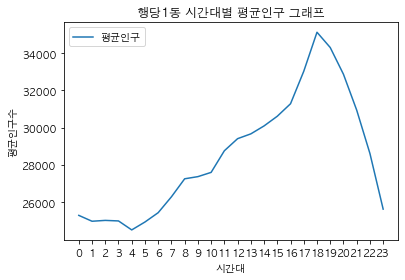

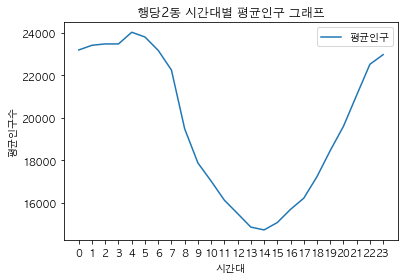

In [ ]:
hangdang1.analysis1(input_name1, input_code1)
hangdang2.analysis1(input_name2, input_code2)

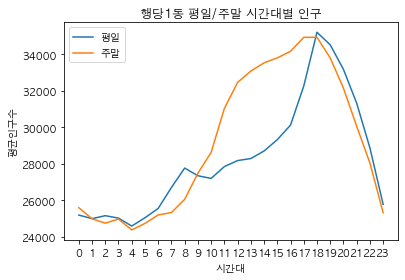

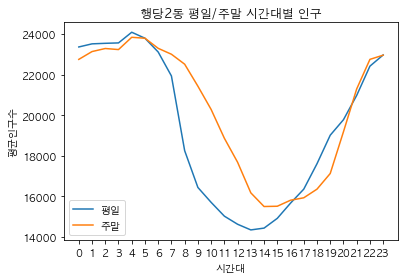

In [ ]:
hangdang1.analysis2()
hangdang2.analysis2()

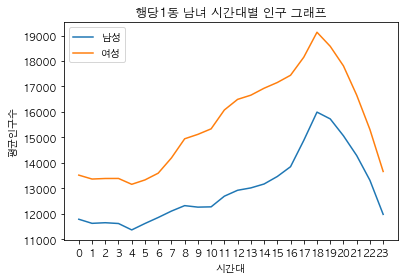

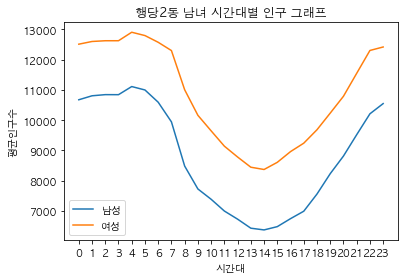

In [ ]:
hangdang1.analysis3()
hangdang2.analysis3()

비교할 행정동을 입력하세요 --> 역삼1동
역삼1동 - 11680640 를 분석합니다!


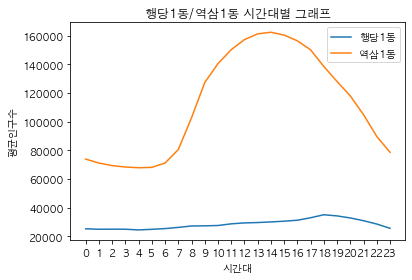

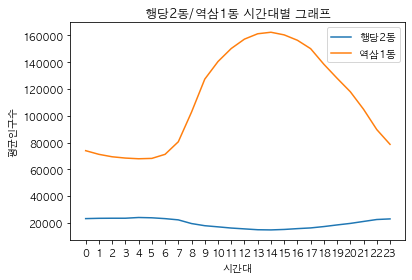

In [ ]:
input_name3 = input('비교할 행정동을 입력하세요 --> ')
input_code3 = dong_search(input_name3)

hangdang1.analysis4(input_name3, input_code3)
hangdang2.analysis4(input_name3, input_code3)

#### Self Check

In [ ]:
# 1번
# 계좌 클래스 
class Customer_account : 
    def __init__(self, name, bal) : 
        self.name = name
        self.balance = bal   # 통장 잔고
        print(self.name,'고객님! 계좌를 개설하셨습니다. 잔고는',self.balance,'원')
    
# 은행 클래스
class Bank : 
    # 입금 거래, customer에 Customer_account 객체 전달
    def deposit(self, customer, amount) : 
        customer.balance += amount
        print(customer.name,'고객님',amount,'원 입금')
        print('입금 후 잔고는',customer.balance, '원')
        
    # 출금 거래, customer에 Customer_account 객체 전달
    def withdrawl(self, customer, amount) : 
        customer.balance -= amount        
        print(customer.name,'고객님', amount,'원 출금')
        print('출금 후 잔고는', customer.balance,'원')
        
    # 계좌이체 거래, sender와 reciever에 Customer_account 객체 전달
    def send_money(self, sender, reciever, amount) : 
        sender.balance -= amount
        reciever.balance += amount
        print(sender.name,'고객님이', reciever.name, '고객님께',amount,'원 송금')
        print('이체 후 잔고는', sender.name,'-',sender.balance, reciever.name, '-',reciever.balance)

In [ ]:
# 2번
ryan = Customer_account('라이언', 50000)
prodo = Customer_account('프로도', 100000)
bank_a = Bank()

bank_a.withdrawl(ryan, 15000)
bank_a.deposit(prodo, 20000)
bank_a.send_money(prodo, ryan, 25000)

라이언 고객님! 계좌를 개설하셨습니다. 잔고는 50000 원
프로도 고객님! 계좌를 개설하셨습니다. 잔고는 100000 원
라이언 고객님 15000 원 출금
출금 후 잔고는 35000 원
프로도 고객님 20000 원 입금
입금 후 잔고는 120000 원
프로도 고객님이 라이언 고객님께 25000 원 송금
이체 후 잔고는 프로도 - 95000 라이언 - 60000


In [ ]:
# 3번
class Bank : 
    def __init__(self) : 
        self.commission = 0
        
    def deposit(self, customer, amount) : 
        self.commission += 500
        customer.balance += (amount-500)
        print(customer.name,'고객님',amount-500,'원 입금 (수수료 500원)')
        print('입금 후 잔고는',customer.balance, '원')
        
    def withdrawl(self, customer, amount) : 
        self.commission += 500
        customer.balance -= (amount-500)
        print(customer.name,'고객님', amount-500,'원 출금 (수수료 500원)')
        print('출금 후 잔고는', customer.balance,'원')
        
    def send_money(self,sender, reciever, amount) : 
        self.commission += 800
        sender.balance -= amount   # 출금에서는 수수료 포함 출금
        reciever.balance += (amount-800)    # 받는 사람은 수수료 제외한 금액 받음
        print(sender.name,'고객님이', reciever.name, '고객님께',amount-800,'원 송금 (수수료 800원)')
        print('이체 후 잔고는', sender.name,'-',sender.balance, reciever.name, '-',reciever.balance)

In [ ]:
# 4번
ryan = Customer_account('라이언', 50000)
prodo = Customer_account('프로도', 100000)
bank_a = Bank()

bank_a.deposit(ryan, 10000)
bank_a.send_money(prodo, ryan, 25000)
bank_a.withdrawl(ryan, 30000)
print('세 건의 거래 이후 수수료 수입은', bank_a.commission)

라이언 고객님! 계좌를 개설하셨습니다. 잔고는 50000 원
프로도 고객님! 계좌를 개설하셨습니다. 잔고는 100000 원
라이언 고객님 9500 원 입금 (수수료 500원)
입금 후 잔고는 59500 원
프로도 고객님이 라이언 고객님께 24200 원 송금 (수수료 800원)
이체 후 잔고는 프로도 - 75000 라이언 - 83700
라이언 고객님 29500 원 출금 (수수료 500원)
출금 후 잔고는 54200 원
세 건의 거래 이후 수수료 수입은 1800
